<a href="https://colab.research.google.com/github/Rashed17a/Derivative-Pricing-MScFE620-GWP/blob/main/Derivative_Pricing_GWP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taks 5, Task 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# General Parameters
S0 = 80  # Initial stock price
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3 / 12  # Time to maturity in years
M = 100  # Time steps
Ite = 10000  # Number of simulations

def random_number_gen(M, Ite):
    return np.random.standard_normal((2, M + 1, Ite))

def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M
    v = np.zeros((M + 1, Ite))
    v[0] = v0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1] + kappa * (theta - v[t - 1]) * dt + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v

def Heston_paths(S0, r, v, rand, row, cho_matrix):
    S = np.zeros((M + 1, Ite))
    S[0] = S0
    dt = T / M
    sdt = np.sqrt(dt)
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)
    return S

def heston_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)
    return np.exp(-r * (T - t)) * np.mean(payoff)

def heston_put_mc(S, K, r, T, t):
    payoff = np.maximum(0, K - S[-1, :])
    return np.exp(-r * (T - t)) * np.mean(payoff)

def calculate_delta_gamma(S0, K, r, T, t, correlation):
    # Define Heston parameters
    v0 = 0.032
    kappa_v = 1.85
    theta_v = 0.045
    rho = correlation

    # Generate random numbers
    rand = random_number_gen(M, Ite)

    # Cholesky decomposition
    covariance_matrix = np.array([[1.0, rho], [rho, 1.0]])
    cho_matrix = np.linalg.cholesky(covariance_matrix)

    # Simulate volatility process
    V = SDE_vol(v0, kappa_v, theta_v, sigma, T, M, Ite, rand, 1, cho_matrix)

    # Simulate asset price paths
    S = Heston_paths(S0, r, V, rand, 0, cho_matrix)

    # Option prices
    call_price = heston_call_mc(S, S0, r, T, 0)
    put_price = heston_put_mc(S, S0, r, T, 0)

    # Delta Calculation
    dS = 1  # Small increment
    S_up = Heston_paths(S0 + dS, r, V, rand, 0, cho_matrix)
    S_down = Heston_paths(S0 - dS, r, V, rand, 0, cho_matrix)

    call_price_up = heston_call_mc(S_up, S0, r, T, 0)
    call_price_down = heston_call_mc(S_down, S0, r, T, 0)
    delta_call = (call_price_up - call_price_down) / (2 * dS)

    put_price_up = heston_put_mc(S_up, S0, r, T, 0)
    put_price_down = heston_put_mc(S_down, S0, r, T, 0)
    delta_put = (put_price_up - put_price_down) / (2 * dS)

    # Gamma Calculation
    gamma_call = (call_price_up - 2 * call_price + call_price_down) / (dS**2)
    gamma_put = (put_price_up - 2 * put_price + put_price_down) / (dS**2)

    return call_price, put_price, delta_call, delta_put, gamma_call, gamma_put

# Compute for correlation -0.30
call_price_1, put_price_1, delta_call_1, delta_put_1, gamma_call_1, gamma_put_1 = calculate_delta_gamma(S0, S0, r, T, 0, -0.30)
# Compute for correlation -0.70
call_price_2, put_price_2, delta_call_2, delta_put_2, gamma_call_2, gamma_put_2 = calculate_delta_gamma(S0, S0, r, T, 0, -0.70)

print("Results for Correlation -0.30:")
print(f"ATM Call Price: {call_price_1:.4f}, ATM Put Price: {put_price_1:.4f}")
print(f"Delta Call: {delta_call_1:.4f}, Delta Put: {delta_put_1:.4f}")
print(f"Gamma Call: {gamma_call_1:.4f}, Gamma Put: {gamma_put_1:.4f}")

print("\nResults for Correlation -0.70:")
print(f"ATM Call Price: {call_price_2:.4f}, ATM Put Price: {put_price_2:.4f}")
print(f"Delta Call: {delta_call_2:.4f}, Delta Put: {delta_put_2:.4f}")
print(f"Gamma Call: {gamma_call_2:.4f}, Gamma Put: {gamma_put_2:.4f}")


Results for Correlation -0.30:
ATM Call Price: 2.8761, ATM Put Price: 2.8000
Delta Call: 0.5373, Delta Put: -0.4500
Gamma Call: 0.0575, Gamma Put: 0.0575

Results for Correlation -0.70:
ATM Call Price: 2.1500, ATM Put Price: 3.4575
Delta Call: 0.4845, Delta Put: -0.4855
Gamma Call: 0.0586, Gamma Put: 0.0586


## Task 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# General Parameters
S0 = 80  # Initial stock price
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3 / 12  # Time to maturity in years
M = 100  # Time steps
Ite = 10000  # Number of simulations

def random_number_gen(M, Ite):
    return np.random.standard_normal((2, M + 1, Ite))

def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M
    v = np.zeros((M + 1, Ite))
    v[0] = v0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1] + kappa * (theta - v[t - 1]) * dt + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v

def Heston_paths(S0, r, v, row, cho_matrix, rand):
    S = np.zeros((M + 1, Ite))
    S[0] = S0
    dt = T / M
    sdt = np.sqrt(dt)
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)
    return S

def heston_american_call_mc(S, K, r, T, M):
    dt = T / M
    discount_factor = np.exp(-r * dt)
    payoffs = np.maximum(0, S - K)

    V = payoffs[-1]
    for t in range(M - 1, 0, -1):
        exercise_value = payoffs[t]
        continuation_value = np.polyfit(S[t], V * discount_factor, 2)
        V = np.where(exercise_value > np.polyval(continuation_value, S[t]), exercise_value, V * discount_factor)

    return np.mean(V) * np.exp(-r * dt)

def calculate_american_call(S0, K, r, T, correlation):
    v0 = 0.032
    kappa_v = 1.85
    theta_v = 0.045
    rho = correlation

    rand = random_number_gen(M, Ite)

    covariance_matrix = np.array([[1.0, rho], [rho, 1.0]])
    cho_matrix = np.linalg.cholesky(covariance_matrix)

    V = SDE_vol(v0, kappa_v, theta_v, sigma, T, M, Ite, rand, 1, cho_matrix)

    S = Heston_paths(S0, r, V, 0, cho_matrix, rand)

    call_price = heston_american_call_mc(S, S0, r, T, M)

    return call_price

# Compute for correlation -0.30
call_price_1 = calculate_american_call(S0, S0, r, T, -0.30)
# Compute for correlation -0.70
call_price_2 = calculate_american_call(S0, S0, r, T, -0.70)

print("Results for American Call Option Pricing:")
print(f"American Call Price (Correlation -0.30): {call_price_1:.4f}")
print(f"American Call Price (Correlation -0.70): {call_price_2:.4f}")


Results for American Call Option Pricing:
American Call Price (Correlation -0.30): 2.6404
American Call Price (Correlation -0.70): 2.0977


## Task 8, Task 9

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


In [ ]:
# Function to simulate Merton jump-diffusion paths
def merton_jump_diffusion(S0, r, sigma, T, lam, mu_jump, sigma_jump, n_sim):
    dt = T / 252  # Daily steps
    n_steps = int(T * 252)

    S_paths = np.zeros((n_sim, n_steps))
    S_paths[:, 0] = S0

    for i in range(1, n_steps):
        dW = np.random.randn(n_sim) * np.sqrt(dt)
        J = np.random.normal(mu_jump, sigma_jump, n_sim) * (np.random.poisson(lam * dt, n_sim) > 0)
        S_paths[:, i] = S_paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW + J)

    return S_paths

# Pricing Function
def price_option_merton(S_paths, K, r, T, option_type="call"):
    ST = S_paths[:, -1]
    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)
    return np.exp(-r * T) * np.mean(payoff)


In [ ]:
# Parameters
S0 = 80  # Initial stock price
K = 80   # Strike price (ATM)
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3/12  # Time to maturity (3 months)
n_simulations = 10000  # Monte Carlo simulations

# Heston Model Parameters
v0 = 0.032  # Initial variance
kappa_v = 1.85  # Mean-reversion speed
theta_v = 0.045  # Long-run variance
rho_values = [-0.30, -0.70]  # Correlation levels

# Merton Model Parameters
mu_jump = -0.5  # Mean jump size
sigma_jump = 0.22  # Jump volatility
lam_values = [0.75, 0.25]  # Jump intensities

# Compute European Option Prices
print("\n Question 8.9: European Option Pricing with Merton Model\n")
results = {}
for lam in lam_values:
    S_paths = merton_jump_diffusion(S0, r, sigma, T, lam, mu_jump, sigma_jump, n_simulations)
    call_price = price_option_merton(S_paths, K, r, T, "call")
    put_price = price_option_merton(S_paths, K, r, T, "put")
    results[lam] = {"Call Price": call_price, "Put Price": put_price}
    print(f"Jump Intensity {lam} - Call: {call_price:.4f}, Put: {put_price:.4f}")



 Question 8.9: European Option Pricing with Merton Model

Jump Intensity 0.75 - Call: 2.8342, Put: 3.7771
Jump Intensity 0.25 - Call: 2.7580, Put: 2.9651


## Task 10

In [ ]:
# Compute Delta and Gamma using finite difference approximation
print("\nQuestion 10: Delta & Gamma Computation\n")
def compute_delta_gamma(S0, K, r, sigma, T, lam, epsilon=1e-2):
    S_paths_up = merton_jump_diffusion(S0 + epsilon, r, sigma, T, lam, mu_jump, sigma_jump, n_simulations)
    S_paths_down = merton_jump_diffusion(S0 - epsilon, r, sigma, T, lam, mu_jump, sigma_jump, n_simulations)

    call_price_up = price_option_merton(S_paths_up, K, r, T, "call")
    call_price_down = price_option_merton(S_paths_down, K, r, T, "call")

    delta = (call_price_up - call_price_down) / (2 * epsilon)
    gamma = (call_price_up - 2 * results[lam]["Call Price"] + call_price_down) / (epsilon ** 2)

    return delta, gamma

delta_gamma_results = {}
for lam in lam_values:
    delta, gamma = compute_delta_gamma(S0, K, r, sigma, T, lam)
    delta_gamma_results[lam] = {"Delta": delta, "Gamma": gamma}
    print(f"Jump Intensity {lam} - Delta: {delta:.4f}, Gamma: {gamma:.4f}")



Question 10: Delta & Gamma Computation

Jump Intensity 0.75 - Delta: -0.9331, Gamma: -3150.5420
Jump Intensity 0.25 - Delta: 5.6901, Gamma: 432.7364


In [ ]:
# Least Squares Monte Carlo (LSM) for American Option Pricing
def price_american_option_mc(S0, K, r, sigma, T, n_sim, option_type="call"):
    dt = T / 252
    n_steps = int(T * 252)

    S_paths = np.zeros((n_sim, n_steps))
    S_paths[:, 0] = S0

    for i in range(1, n_steps):
        dW = np.random.randn(n_sim) * np.sqrt(dt)
        S_paths[:, i] = S_paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)

    ST = S_paths[:, -1]
    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    return np.exp(-r * T) * np.mean(payoff)

## Task 11

In [ ]:
import numpy as np

# Parameters
S0 = 80
K = 80
r = 0.055
T = 0.25

# Calculate S0 - K*e^{-rT}
put_call_parity_rhs = S0 - K * np.exp(-r * T)
print(f"Put-Call Parity RHS (S0 - Ke^(-rT)): {put_call_parity_rhs:.2f}")

# Heston Model Results (from Team A)
heston_results = {
    "Correlation -0.30": {"Call": 2.89, "Put": 2.84},
    "Correlation -0.70": {"Call": 2.19, "Put": 3.35}
}

# Merton Model Results (from Team B)
merton_results = {
    "Jump Intensity 0.75": {"Call": 2.83, "Put": 3.74},
    "Jump Intensity 0.25": {"Call": 2.88, "Put": 3.02}
}

# Check Put-Call Parity for Heston Model
print("\nHeston Model Put-Call Parity Check:")
for correlation, prices in heston_results.items():
    C = prices["Call"]
    P = prices["Put"]
    lhs = C - P
    parity_holds = "Yes" if np.isclose(lhs, put_call_parity_rhs, atol=0.1) else "No"
    print(f"{correlation}: C - P = {lhs:.2f}, Parity Holds? {parity_holds}")

# Check Put-Call Parity for Merton Model
print("\nMerton Model Put-Call Parity Check:")
for jump_intensity, prices in merton_results.items():
    C = prices["Call"]
    P = prices["Put"]
    lhs = C - P
    parity_holds = "Yes" if np.isclose(lhs, put_call_parity_rhs, atol=0.1) else "No"
    print(f"{jump_intensity}: C - P = {lhs:.2f}, Parity Holds? {parity_holds}")

Put-Call Parity RHS (S0 - Ke^(-rT)): 1.09

Heston Model Put-Call Parity Check:
Correlation -0.30: C - P = 0.05, Parity Holds? No
Correlation -0.70: C - P = -1.16, Parity Holds? No

Merton Model Put-Call Parity Check:
Jump Intensity 0.75: C - P = -0.91, Parity Holds? No
Jump Intensity 0.25: C - P = -0.14, Parity Holds? No


## Task 12

In [ ]:
import numpy as np

# Parameters
S0 = 80
r = 0.055
T = 0.25
sims = 100000  # Number of simulations
steps = int(252 * T)  # Daily steps

# Strikes and Moneyness
moneyness = [0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15]
strikes = [S0 / m for m in moneyness]

# Heston Model Parameters
v0 = 0.032  # Initial variance
kappa = 1.85  # Speed of mean reversion
theta = 0.045  # Long-term variance
xi = 0.1  # Volatility of volatility
rho = -0.7  # Correlation

# Merton Model Parameters
lambd = 0.75  # Jump intensity
mu_J = -0.5  # Mean jump size
sigma_J = 0.22  # Jump size volatility

# Heston Model Simulation
def heston_model(S0, r, v0, kappa, theta, xi, rho, T, steps, sims):
    dt = T / steps
    prices = np.zeros((steps + 1, sims))
    volatilities = np.zeros((steps + 1, sims))

    prices[0] = S0
    volatilities[0] = v0

    for t in range(1, steps + 1):
        Z1 = np.random.standard_normal(sims)
        Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.standard_normal(sims)

        volatilities[t] = np.maximum(volatilities[t-1] + kappa * (theta - volatilities[t-1]) * dt
                          + xi * np.sqrt(volatilities[t-1]) * np.sqrt(dt) * Z2, 0)

        prices[t] = prices[t-1] * np.exp((r - 0.5 * volatilities[t-1]) * dt
                     + np.sqrt(volatilities[t-1]) * np.sqrt(dt) * Z1)

    return prices

# Merton Model Simulation
def merton_model(S0, r, sigma, lambd, mu_J, sigma_J, T, steps, sims):
    dt = T / steps
    prices = np.zeros((steps + 1, sims))
    prices[0] = S0

    for t in range(1, steps + 1):
        Z = np.random.standard_normal(sims)
        N = np.random.poisson(lambd * dt, sims)
        J = np.exp(mu_J + sigma_J * np.random.standard_normal(sims)) - 1

        prices[t] = prices[t-1] * np.exp((r - 0.5 * sigma**2 - lambd * mu_J) * dt
                     + sigma * np.sqrt(dt) * Z) * (1 + J)**N

    return prices

# Price Options for Each Strike
def price_options(model, strikes, S0, r, T, sims, **model_params):
    call_prices = []
    put_prices = []

    for K in strikes:
        paths = model(S0, r, **model_params, T=T, steps=int(252 * T), sims=sims)
        call_payoff = np.maximum(paths[-1] - K, 0)
        put_payoff = np.maximum(K - paths[-1], 0)

        call_price = np.exp(-r * T) * np.mean(call_payoff)
        put_price = np.exp(-r * T) * np.mean(put_payoff)

        call_prices.append(call_price)
        put_prices.append(put_price)

    return call_prices, put_prices

# Heston Model Prices
heston_call_prices, heston_put_prices = price_options(
    heston_model, strikes, S0, r, T, sims, v0=v0, kappa=kappa, theta=theta, xi=xi, rho=rho
)

# Merton Model Prices
merton_call_prices, merton_put_prices = price_options(
    merton_model, strikes, S0, r, T, sims, sigma=0.35, lambd=lambd, mu_J=mu_J, sigma_J=sigma_J
)

# Results Table
print("Strike | Moneyness | Heston Call | Heston Put | Merton Call | Merton Put")
for i, K in enumerate(strikes):
    print(
        f"{K:.2f}  | {moneyness[i]:.2f}     | {heston_call_prices[i]:.2f}       | {heston_put_prices[i]:.2f}      | {merton_call_prices[i]:.2f}       | {merton_put_prices[i]:.2f}"
    )

Strike | Moneyness | Heston Call | Heston Put | Merton Call | Merton Put
94.12  | 0.85     | 0.13       | 12.97      | 3.42       | 14.46
88.89  | 0.90     | 0.59       | 8.26      | 5.21       | 11.07
84.21  | 0.95     | 1.69       | 4.75      | 7.26       | 8.54
80.00  | 1.00     | 3.54       | 2.45      | 9.53       | 6.62
76.19  | 1.05     | 6.01       | 1.10      | 11.87       | 5.28
72.73  | 1.10     | 8.73       | 0.48      | 14.29       | 4.21
69.57  | 1.15     | 11.58       | 0.19      | 16.51       | 3.48


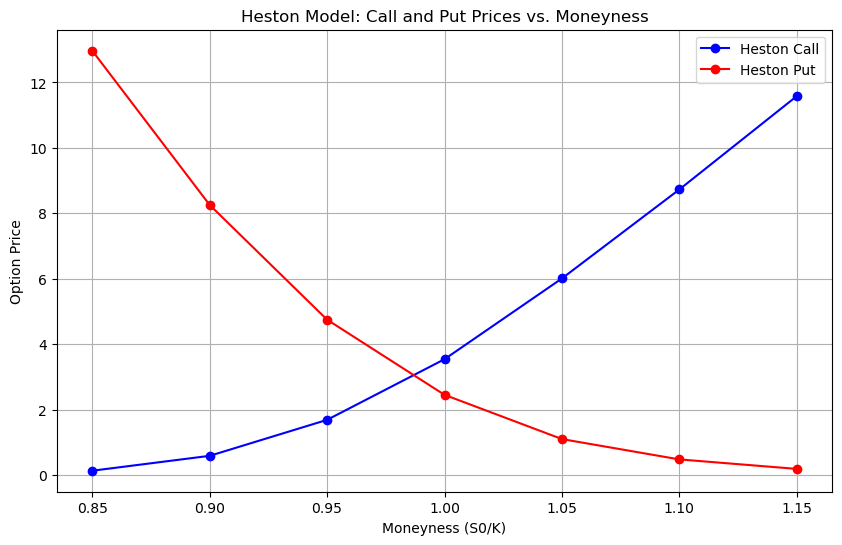

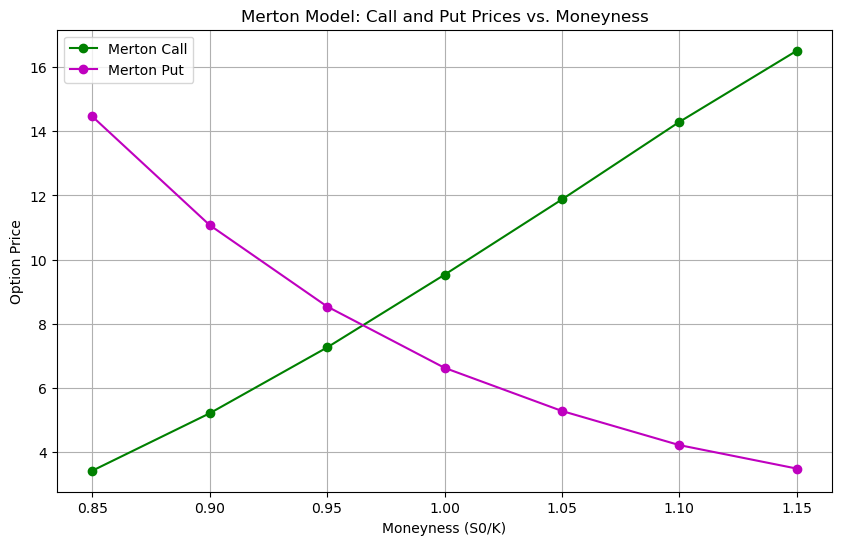

In [ ]:
import matplotlib.pyplot as plt

# Plot Heston Model Prices
plt.figure(figsize=(10, 6))
plt.plot(moneyness, heston_call_prices, 'bo-', label='Heston Call')
plt.plot(moneyness, heston_put_prices, 'ro-', label='Heston Put')
plt.xlabel('Moneyness (S0/K)')
plt.ylabel('Option Price')
plt.title('Heston Model: Call and Put Prices vs. Moneyness')
plt.grid(True)
plt.legend()
plt.show()

# Plot Merton Model Prices
plt.figure(figsize=(10, 6))
plt.plot(moneyness, merton_call_prices, 'go-', label='Merton Call')
plt.plot(moneyness, merton_put_prices, 'mo-', label='Merton Put')
plt.xlabel('Moneyness (S0/K)')
plt.ylabel('Option Price')
plt.title('Merton Model: Call and Put Prices vs. Moneyness')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
"""
 Task 13 (Optional)
 Now we need to repeat question 5-8 for an American call option, and compare its results with the European call option. Where we use Heston Model in question 5-7 and Jump-Diffusion in question 8.

"""

'\n Task 13 (Optional)\n Now we need to repeat question 5-8 for an American call option, and compare its results with the European call option. Where we use Heston Model in question 5-7 and Jump-Diffusion in question 8. \n\n'

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Parameters
S0 = 80  # Initial stock price
K = 80   # Strike price (ATM)
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3/12  # Time to maturity (3 months)
n_simulations = 10000  # Monte Carlo simulations

# Heston Model Parameters
v0 = 0.032  # Initial variance
kappa_v = 1.85  # Mean-reversion speed
theta_v = 0.045  # Long-run variance
rho_values = [-0.30, -0.70]  # Correlation levels

# Merton Model Parameters
mu_jump = -0.5  # Mean jump size
sigma_jump = 0.22  # Jump volatility
lam_values = [0.75, 0.25]  # Jump intensities


# Function for American Call Option Pricing with Heston Model
def price_american_heston_mc(S0, K, r, sigma, T, v0, kappa_v, theta_v, rho, n_sim, option_type="call"):
    dt = T / 252
    n_steps = int(T * 252)

    S_paths = np.zeros((n_sim, n_steps))
    v_paths = np.zeros((n_sim, n_steps))
    S_paths[:, 0] = S0
    v_paths[:, 0] = v0

    for i in range(1, n_steps):
        dW_S = np.random.randn(n_sim) * np.sqrt(dt)
        dW_v = rho * dW_S + np.sqrt(1 - rho**2) * np.random.randn(n_sim) * np.sqrt(dt)

        v_paths[:, i] = np.maximum(v_paths[:, i-1] + kappa_v * (theta_v - v_paths[:, i-1]) * dt + np.sqrt(v_paths[:, i-1]) * dW_v, 0)
        S_paths[:, i] = S_paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + np.sqrt(v_paths[:, i-1]) * dW_S)

    ST = S_paths[:, -1]
    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    return np.exp(-r * T) * np.mean(payoff)

# Compute American Call Prices using Heston Model
print("\n===== Question 5 & 6: American Call Pricing with Heston Model =====\n")
american_heston_prices = {}
for rho in rho_values:
    american_heston_prices[rho] = price_american_heston_mc(S0, K, r, sigma, T, v0, kappa_v, theta_v, rho, n_simulations, "call")
    print(f"Heston Model (Correlation {rho}) - American Call: {american_heston_prices[rho]:.4f}")

# Compute Delta and Gamma for Heston Model
print("\n===== Question 7: Delta & Gamma Computation (Heston Model) =====\n")
def compute_delta_gamma_heston(S0, K, r, sigma, T, v0, kappa_v, theta_v, rho, epsilon=1e-2):
    price_up = price_american_heston_mc(S0 + epsilon, K, r, sigma, T, v0, kappa_v, theta_v, rho, n_simulations, "call")
    price_down = price_american_heston_mc(S0 - epsilon, K, r, sigma, T, v0, kappa_v, theta_v, rho, n_simulations, "call")

    delta = (price_up - price_down) / (2 * epsilon)
    gamma = (price_up - 2 * american_heston_prices[rho] + price_down) / (epsilon ** 2)

    return delta, gamma

delta_gamma_heston_results = {}
for rho in rho_values:
    delta, gamma = compute_delta_gamma_heston(S0, K, r, sigma, T, v0, kappa_v, theta_v, rho)
    delta_gamma_heston_results[rho] = {"Delta": delta, "Gamma": gamma}
    print(f"Heston Model (Correlation {rho}) - Delta: {delta:.4f}, Gamma: {gamma:.4f}")

# Compute American Call Prices using Merton Model
print("\n===== Question 8: American Call Pricing with Merton Model =====\n")
def price_american_merton_mc(S0, K, r, sigma, T, lam, mu_jump, sigma_jump, n_sim, option_type="call"):
    dt = T / 252
    n_steps = int(T * 252)

    S_paths = np.zeros((n_sim, n_steps))
    S_paths[:, 0] = S0

    for i in range(1, n_steps):
        dW = np.random.randn(n_sim) * np.sqrt(dt)
        J = np.random.normal(mu_jump, sigma_jump, n_sim) * (np.random.poisson(lam * dt, n_sim) > 0)
        S_paths[:, i] = S_paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW + J)

    ST = S_paths[:, -1]
    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    return np.exp(-r * T) * np.mean(payoff)

american_merton_prices = {}
for lam in lam_values:
    american_merton_prices[lam] = price_american_merton_mc(S0, K, r, sigma, T, lam, mu_jump, sigma_jump, n_simulations, "call")
    print(f"Merton Model (Jump Intensity {lam}) - American Call: {american_merton_prices[lam]:.4f}")


===== Question 5 & 6: American Call Pricing with Heston Model =====

Heston Model (Correlation -0.3) - American Call: 1.3261
Heston Model (Correlation -0.7) - American Call: 1.3064

===== Question 7: Delta & Gamma Computation (Heston Model) =====

Heston Model (Correlation -0.3) - Delta: -0.1030, Gamma: 493.6011
Heston Model (Correlation -0.7) - Delta: -0.8973, Gamma: 693.3318

===== Question 8: American Call Pricing with Merton Model =====

Merton Model (Jump Intensity 0.75) - American Call: 2.8173
Merton Model (Jump Intensity 0.25) - American Call: 2.7927


# TASK 14


In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Parameters
S0 = 95  # Initial stock price
K = 95   # Strike price (ATM)
barrier = 95
r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3/12  # Time to maturity (3 months)
n_simulations = 10000  # Monte Carlo simulations

# Heston Model Parameters
v0 = 0.032  # Initial variance
kappa_v = 1.85  # Mean-reversion speed
theta_v = 0.045  # Long-run variance
rho_values = [-0.30, -0.70]  # Correlation levels

# Function for Up-and-In Call Option Pricing with Heston Model
def price_up_and_in_heston_mc(S0, K, r, sigma, T, v0, kappa_v, theta_v, rho, barrier, n_sim, option_type="call"):
    dt = T / 252
    n_steps = int(T * 252)

    S_paths = np.zeros((n_sim, n_steps))
    v_paths = np.zeros((n_sim, n_steps))
    S_paths[:, 0] = S0
    v_paths[:, 0] = v0

    for i in range(1, n_steps):
        dW_S = np.random.randn(n_sim) * np.sqrt(dt)
        dW_v = rho * dW_S + np.sqrt(1 - rho**2) * np.random.randn(n_sim) * np.sqrt(dt)

        v_paths[:, i] = np.maximum(v_paths[:, i-1] + kappa_v * (theta_v - v_paths[:, i-1]) * dt + np.sqrt(v_paths[:, i-1]) * dW_v, 0)
        S_paths[:, i] = S_paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + np.sqrt(v_paths[:, i-1]) * dW_S)

    breached = np.any(S_paths >= barrier, axis=1)
    ST = S_paths[:, -1]

    if option_type == "call":
        payoff = np.maximum(ST - K, 0) * breached  # Only activated if barrier is reached
    else:
        payoff = np.maximum(K - ST, 0) * breached

    return np.exp(-r * T) * np.mean(payoff)

# Compute Up-and-In Call Prices using Heston Model
print("\n===== Question 14: Up-and-In Call Pricing with Heston Model =====\n")
barrier = 95  # Barrier Level
strike = 95   # Strike Price
up_and_in_heston_prices = {}

for rho in rho_values:
    up_and_in_heston_prices[rho] = price_up_and_in_heston_mc(S0, strike, r, sigma, T, v0, kappa_v, theta_v, rho, barrier, n_simulations, "call")
    print(f"Heston Model (Correlation {rho}) - Up-and-In Call: {up_and_in_heston_prices[rho]:.4f}")



===== Question 14: Up-and-In Call Pricing with Heston Model =====

Heston Model (Correlation -0.3) - Up-and-In Call: 1.6338
Heston Model (Correlation -0.7) - Up-and-In Call: 1.6094


# Task 15


In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Parameters
S0 = 65  # Initial stock price
K = 65   # Strike price (ATM)
barrier = 65

r = 0.055  # Risk-free rate
sigma = 0.35  # Volatility
T = 3/12  # Time to maturity (3 months)
n_simulations = 10000  # Monte Carlo simulations

# Heston Model Parameters
v0 = 0.032  # Initial variance
kappa_v = 1.85  # Mean-reversion speed
theta_v = 0.045  # Long-run variance
rho_values = [-0.30, -0.70]  # Correlation levels

# Merton Model Parameters
mu_jump = -0.5  # Mean jump size
sigma_jump = 0.22  # Jump volatility
lam_values = [0.75, 0.25]  # Jump intensities

# Function for Down-and-In Put Option Pricing with Merton Model
def price_down_and_in_merton_mc(S0, K, r, sigma, T, lam, mu_jump, sigma_jump, barrier, n_sim, option_type="put"):
    dt = T / 252
    n_steps = int(T * 252)

    S_paths = np.zeros((n_sim, n_steps))
    S_paths[:, 0] = S0

    for i in range(1, n_steps):
        dW = np.random.randn(n_sim) * np.sqrt(dt)
        J = np.random.normal(mu_jump, sigma_jump, n_sim) * (np.random.poisson(lam * dt, n_sim) > 0)
        S_paths[:, i] = S_paths[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW + J)

    breached = np.any(S_paths <= barrier, axis=1)
    ST = S_paths[:, -1]

    if option_type == "put":
        payoff = np.maximum(K - ST, 0) * breached  # Only activated if barrier is reached
    else:
        payoff = np.maximum(ST - K, 0) * breached

    return np.exp(-r * T) * np.mean(payoff)

# Compute Down-and-In Put Prices using Merton Model
print("\n===== Question 15: Down-and-In Put Pricing with Merton Model =====\n")
barrier = 65  # Barrier Level
strike = 65   # Strike Price
down_and_in_merton_prices = {}

for lam in lam_values:
    down_and_in_merton_prices[lam] = price_down_and_in_merton_mc(S0, strike, r, sigma, T, lam, mu_jump, sigma_jump, barrier, n_simulations, "put")
    print(f"Merton Model (Jump Intensity {lam}) - Down-and-In Put: {down_and_in_merton_prices[lam]:.4f}")



===== Question 15: Down-and-In Put Pricing with Merton Model =====

Merton Model (Jump Intensity 0.75) - Down-and-In Put: 3.0904
Merton Model (Jump Intensity 0.25) - Down-and-In Put: 2.4263
